In [16]:
# Import of packages 
import pandas as pd
import math
import scipy
import scipy.stats
import numpy as np
import random
import sys
import fractions
# setup plotting tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#from util import lexsort_rows
from scipy.sparse.linalg import eigsh
from numpy.linalg import inv
from numpy.linalg import matrix_power
import itertools
from sympy import cos, nsolve, Symbol
from itertools import groupby
from functools import reduce
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import operator
from operator import itemgetter
from scipy.spatial import Delaunay
import networkx as nx
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from matplotlib.patches import Polygon
from pylab import rcParams
from matplotlib.collections import PatchCollection 
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

# Elliptic Arc

In [72]:
from sage.symbolic.integration.integral import definite_integral
from sage.calculus.integration import numerical_integral
from math import pi
from sage.plot.arc import Arc
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cmath
from importlib import reload
import matplotlib.pyplot as plt
import os
import mpl_toolkits.mplot3d.axes3d as axes3d
plt=reload(plt)
import matplotlib as mpl
import matplotlib.cm as cm
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})

In [73]:
A = np.linspace(0.1,10.1,100)
B = np.linspace(0.1,10.1,100)

In [74]:
def find_A(l1,l2,tol):
    A_end = 0
    l3 = l1 + l2 + 2 * sqrt(l1+l2)
    f = numerical_integral(sqrt((l1^2+l2^2)/4 *sin(x)^2 + A_end^2 * cos(x)^2),0,pi)
    while f[0] < l3:
        A_end += 1
        f = numerical_integral(sqrt((l1^2+l2^2)/4 *sin(x)^2 + A_end^2 * cos(x)^2),0,pi)
    A_start = min(0,A_end - 1)
    A_mid = (A_end + A_start)/2
    while abs(numerical_integral(sqrt((l1^2+l2^2)/4*sin(x)^2 + A_mid^2 * cos(x)^2),0,pi)[0] - l3) > tol:
        if numerical_integral(sqrt((l1^2+l2^2)/4*sin(x)^2 + A_mid^2 * cos(x)^2),0,pi)[0] < l3:
            A_start = A_mid
            A_mid = (A_end + A_start)/2
        else:
            A_end = A_mid
            A_mid = (A_end + A_start)/2
    return A_mid

In [75]:
M = matrix(RDF, 100, [find_A(a,b,1e-3) for a in A for b in B])

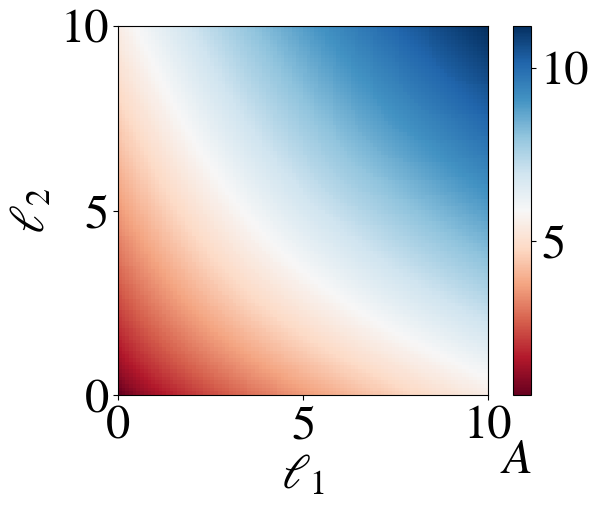

In [76]:
plt.rcParams.update({'font.size': 35})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.imshow(M,cmap=cm.RdBu,extent=(0, 10, 0, 10),origin = "lower", interpolation='none')
plt.xlabel(r'$\ell_1$')
plt.ylabel(r'$\ell_2$')
plt.colorbar().set_label(r'$A$', labelpad=-53, y=-0.12, rotation=0)
plt.show()
#increase the font size

In [184]:
def find_r(l1,l2,theta):
    angle = arctan(l2/l1)
    if (angle < theta and theta < pi - angle) or (pi + angle < theta and theta < 2*pi - angle):
        return l2/(2 * abs(sin(theta)))
    else:
        return l1/(2 * abs(cos(theta)))

In [185]:
num_mesh = 600
l1, l2 = 2,3
h = find_A(2,3,1e-10)
l1_x = np.linspace(-1,1,num_mesh)
l1_y = np.array([-1.5]*num_mesh)
l2_x = np.array([1]*num_mesh)
l2_y = np.linspace(-1.5,1.5, num_mesh)
T = np.linspace(0,pi,num_mesh)
theta = arctan(l2/l1)
r = find_r(l1,l2,theta)
l3_x = r * cos(theta) * np.cos(T)
l3_y = r * sin(theta) * np.cos(T)
l3_z = sin(T) * h

In [186]:
Theta = np.linspace(0,2*pi,num_mesh)
T = np.linspace(0,pi,num_mesh)
R = np.array([])
for i in range(num_mesh):
    R = np.append(R,find_r(l1,l2,Theta[i]))
Theta, T = np.meshgrid(Theta, T)
R = np.meshgrid(R,R)[0]
X = R * np.cos(Theta) * np.cos(T)
Y = R * np.sin(Theta) * np.cos(T)
Z = sin(T) * h

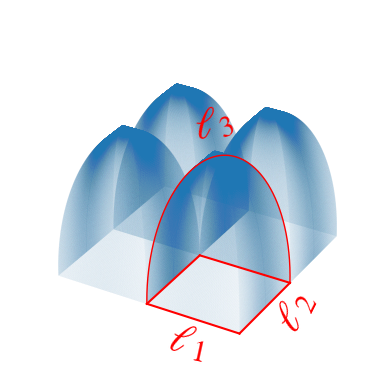

In [208]:
plt.rcParams.update({'font.size': 25})
XX = np.concatenate(( X-2, X-2, X, X), axis = 0)
YY = np.concatenate(( Y, Y+3, Y, Y+3), axis = 0)
ZZ = np.concatenate((Z,Z,Z,Z), axis = 0)
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(projection='3d')
ax.text(0.2, -3.5, 0, r"$\ell_1$", (1, 1, -0.5), color='red', zorder=15, fontsize = 'large')
ax.text(1, 0.3, -0.8, r"$\ell_2$", (0, 1, 0.5), color='red', zorder=15, fontsize = 'large')
ax.text(-0.8, 0.4, 4, r"$\ell_3$", (1, 1, 0.5), color='red', zorder=15, fontsize = 'large')
plot = ax.scatter(XX, YY, ZZ, s = 0.2, alpha = 0.1, edgecolor='none', zorder= 0)
ax.plot(l1_x,l1_y, color = "red", zorder= 3)
ax.plot(l1_x,np.array([1.5]*num_mesh), color = "red", zorder= 5)
ax.plot(l2_x,l2_y, color = "red", zorder= 10)
ax.plot(np.array([-1]*num_mesh),l2_y, color = "red", zorder= 15)
ax.plot(l3_x,l3_y,l3_z,color = "red",linewidth= 1, zorder= 20)
plt.axis('off')
plt.show()

# Laplician for triangulated torus

In [17]:
def find_neighbourhood(N,L,x):
    def left(N,L,x):
        i = x % N
        j = x // N
        return (i - 1 + N) % N + N * j
    def right(N,L,x):
        i = x % N
        j = x // N
        return (i + 1 + N) % N + N * j
    def up(N,L,x):
        i = x % N
        j = x // N
        return (i + N * (j+1) + N * L) % (N * L)
    def down(N,L,x):
        i = x % N
        j = x // N
        return (i + N * (j-1) + N * L) % (N * L)
    w1_out,w2_out,w3_out = right(N,L,x), up(N,L,x), up(N,L,right(N,L,x))
    return w1_out,w2_out,w3_out

In [18]:
def B_and_G(N,L,w1,w2,w3):
    num_nodes = N * L
    num_edges = N * L * 3
    num_faces = N * L * 2
    B1 = matrix(QQ,num_nodes, num_edges)
    B2 = matrix(QQ, num_edges, num_faces)
    G1 = matrix(QQ,num_edges, num_edges)
    for x in range(num_nodes):
        w1_out,w2_out,w3_out = find_neighbourhood(N,L,x)
        for j in range(3):
            edge = [w1_out,w2_out,w3_out][j]
            B1[x, 3*x + j] = -1
            B1[edge, 3*x + j] = 1
            G1[3*x + j,3*x + j] = sqrt([w1,w2,w3][j], prec=100)
        B2[1+3*x,2*x], B2[(3 * N +3*x)%num_edges,2*x], B2[3*x,2*x+1], B2[(4+3*x)%(3*N) + 3 * (N * (x // N)),2*x+1] = 1,1,1,1
        B2[2+3*x,2*x],B2[2+3*x,2*x+1] = -1, -1
    return B1, B2, G1

In [19]:
def L1(N,L,w1,w2,w3):
    B1, B2, G1 = B_and_G(N,L,w1,w2,w3)
    Gm = G1.inverse()
    L1up = Gm * B2 * B2.transpose() * Gm
    L1down = G1 * B1.transpose() * B1 * G1
    return L1up, L1down

In [20]:
L1up, L1down = L1(10,10,w1,w2,w3)
L1up

300 x 300 dense matrix over Rational Field (use the '.str()' method to see the entries)

## Spectrum Check

In [21]:
#L1down
def Lambda_1s(NN,LL,w1,w2,w3):
    L = []
    for nx in range(NN):
        for ny in range(LL):
            kx = 2 * pi * nx / NN
            ky = 2 * pi * ny / LL
            L.append( 4 * w1 * sin(kx/2)^2 + 4 * w2 * sin(ky/2)^2 + 4 * w3 * sin((kx+ky)/2)^2)
    L = [N(v) for v in L if v]
    L.sort()
    return L



In [22]:
def Check1(NN,LL,w1,w2,w3):
    L = Lambda_1s(NN,LL,w1,w2,w3)
    V = vector(RR,L1(NN,LL,w1,w2,w3)[1].eigenvalues())
    V = [v for v in V if v]
    V.sort()
    for i in range(len(V)):
        if not math.isclose(V[i],L[i]):
            return False
    return True

In [7]:
Check1(5,5,1,2,4)

True

In [23]:
#L1up
def Lambda_2s(NN,LL,w1,w2,w3):
    L = []
    for nx in range(NN):
        for ny in range(LL):
            kx = 2 * pi * nx / NN
            ky = 2 * pi * ny / LL
            Constant = 1/w1 + 1/w2 + 1/w3
            f = e^(i*ky)/w1 + e^(-i*kx)/w2 + 1/w3
            L.append(N(Constant - sqrt(norm(f))).real())
            L.append(N(Constant + sqrt(norm(f))).real())
    L = [N(v.real()) for v in L if v]
    L.sort()
    return L

In [10]:
def Check2(NN,LL,w1,w2,w3):
    L = Lambda_2s(NN,LL,w1,w2,w3)
    V = L1(NN,LL,w1,w2,w3)[0].eigenvalues()
    V = [v.real() for v in V]
    V = [v for v in V if v]
    V.sort()
    for i in range(len(V)):
        if not math.isclose(V[i],L[i]):
            return False
    return True

In [11]:
Check2(5,5,1,1,2)

True

# Laplician for Triangulated Waffle

In [151]:
def find_neighbourhood(N,L,x):
    def left(N,L,x):
        i = x % N
        j = x // N
        return (i - 1 + N) % N + N * j
    def right(N,L,x):
        i = x % N
        j = x // N
        return (i + 1 + N) % N + N * j
    def up(N,L,x):
        i = x % N
        j = x // N
        return (i + N * (j+1) + N * L) % (N * L)
    def down(N,L,x):
        i = x % N
        j = x // N
        return (i + N * (j-1) + N * L) % (N * L)
    w1_out,w2_out,w3_out,w4_out = right(N,L,x), up(N,L,x), up(N,L,right(N,L,x)),down(N,L,right(N,L,x))
    return w1_out,w2_out,w3_out,w4_out

In [152]:
def up(N,L,x):
        i = x % N
        j = x // N
        return (i + N * (j-1) + N * L) % (N * L)
def left(N,L,x):
        i = x % N
        j = x // N
        return (i - 1 + N) % N + N * j
def B_and_G(N,L,w1,w2,w3,w_4):
    num_nodes = N * L
    num_edges = N * L * 4
    num_faces = N * L * 4
    B1 = matrix(QQ,num_nodes, num_edges)
    B2 = matrix(QQ, num_edges, num_faces)
    G1 = matrix(QQ,num_edges, num_edges)
    for x in range(num_nodes):
        w1_out,w2_out,w3_out,w4_out = find_neighbourhood(N,L,x)
        for j in range(4):
            edge = [w1_out,w2_out,w3_out,w4_out][j]
            B1[x, 4 * x + j] = -1
            B1[edge, 4 * x + j] = 1
            G1[4 * x + j,4 * x + j] = sqrt([w1,w2,w3,w_4][j], prec=100)
        B2[4*x+1,4*x],B2[4*up(N,L,x),4*x],B2[4*x+2,4*x] = 1,1,-1
        B2[4*x,4*x+1],B2[4*left(N,L,x)+1,4*x+1],B2[4*x+2,4*x+1] = 1,1,-1
        B2[4*x+1,4*x+2],B2[4*x,4*x+2],B2[4*up(N,L,x)+3,4*x+2] = 1,-1,1
        B2[4*up(N,L,x),4*x+3],B2[4*left(N,L,x)+1,4*x+3],B2[4*up(N,L,x)+3,4*x+3] = -1,1,1
    return B1, B2, G1

In [153]:
def L1(N,L,w1,w2,w3,w4):
    B1, B2, G1 = B_and_G(N,L,w1,w2,w3,w4)
    Gm = G1.inverse()
    L1up = Gm * B2 * B2.transpose() * Gm
    L1down = G1 * B1.transpose() * B1 * G1
    return L1up, L1down

## Spectrum Check

In [28]:
#L1down
def Lambda_1s(NN,LL,w1,w2,w3,w4):
    L = []
    for nx in range(NN):
        for ny in range(LL):
            kx = 2 * pi * nx / NN
            ky = 2 * pi * ny / LL
            L.append( 4 * w1 * sin(kx/2)^2 + 4 * w2 * sin(ky/2)^2 + 4 * w3 * sin((kx+ky)/2)^2+ 4 * w4 * sin((kx-ky)/2)^2)
    L = [N(v.real()) for v in L if v]
    L.sort()
    return L

In [29]:
def Check1(NN,LL,w1,w2,w3,w4):
    L = Lambda_1s(NN,LL,w1,w2,w3,w4)
    V = vector(RR,L1(NN,LL,w1,w2,w3,w4)[1].eigenvalues())
    V = [v for v in V if v]
    V.sort()
    for i in range(len(V)):
        if not math.isclose(V[i],L[i]):
            return False
    return True

In [36]:
#L1up
def Lambda_2s(NN,LL,w1,w2,w3,w4):
    L = []
    for nx in range(NN):
        for ny in range(LL):
            kx = 2 * pi * nx / NN
            ky = 2 * pi * ny / LL
            x = var('x')
            M = matrix([[-x+1/w1+1/w2+1/w3,e^(I*ky)/w1+e^(-I*kx)/w2+1/w3,-e^(I*ky)/w1+1/w2,-1/w1+e^(-I*kx)/w2],
                [e^(-I*ky)/w1+e^(I*kx)/w2+1/w3,-x+1/w1+1/w2+1/w3,-1/w1+e^(I*kx)/w2,-e^(-I*ky)/w1+1/w2],
                [-e^(-I*ky)/w1+1/w2,-1/w1+e^(-I*kx)/w2,-x+1/w1+1/w2+1/w4,e^(-I*ky)/w1+e^(-I*kx)/w2+1/w4],
                [-1/w1+e^(I*kx)/w2,-e^(I*ky)/w1+1/w2,e^(I*ky)/w1+e^(I*kx)/w2+1/w4,-x+1/w1+1/w2+1/w4]])
            for s in solve(det(M),x):
                L.append(s.rhs())
                #if s.rhs() < 0:
                    #return M,solve(det(M),x)
    L = [N(v.real()) for v in L if v]
    L.sort()
    return L

In [205]:
def find_L(kx,ky,w1,w2,w3,w4):
    R = PolynomialRing(QQ, 'x')
    f = (w1*w2*w3*w4*x^4 + (-2*w1*w2*w3 + (-2*w1*w2 + (-4*w1 - 4*w2)*w3)*w4)*x^3 + (4*w1*w2 + (w1*(-2*cos(kx) + 6) + w2*(-2*cos(ky) + 6))*w3 + (((-4*cos(kx) + 4)*cos(1*ky) + 4*cos(kx) + 12)*w3 + w1*(-2*cos(1*kx) + 6) + w2*(-2*cos(ky) + 6))*w4)*x^2 + ((8*cos(kx)*cos(ky) - 8*sin(kx)*sin(ky) - 8)*w3 + (8*cos(kx)*cos(ky) + 8*sin(kx)*sin(ky) - 8)*w4 + w1*(8*cos(kx) - 8) + w2*(8*cos(ky) - 8))*x)/(w1*w2*w3*w4)
    return nroots(f)
def Lambda_2s(NN,LL,w1,w2,w3,w4):
    L = []
    for i in range(NN):
        for j in range(LL):
            Sol = find_L(2*i*pi/NN,2*j*pi/LL,w1,w2,w3,w4)
            S = [float(s) for s in Sol if s]
            L.extend(S)
    L.sort()
    return L

In [206]:
def Check2(NN,LL,w1,w2,w3,w4):
    L = Lambda_2s(NN,LL,w1,w2,w3,w4)
    V = L1(NN,LL,w1,w2,w3,w4)[0].eigenvalues()
    V = [v.real() for v in V]
    V = [v for v in V if v]
    V.sort()
    for i in range(len(V)):
        if not math.isclose(V[i],L[i]):
            return False
    return True

In [207]:
Check2(5,5,1,4,4/9,4)

True

# Plot $L_1^{down}$

In [77]:
def L_1_down_torus(NN,LL,w1,w2,w3):
    def find_L(kx,ky,w1,w2,w3):
        return 4 * w1 * sin(kx/2)^2 + 4 * w2 * sin(ky/2)^2 + 4 * w3 * sin((kx+ky)/2)^2
    L = []
    KX = np.linspace(0,n(2 * pi),NN)
    KY = np.linspace(0,n(2 * pi),LL)
    M = matrix(RDF, NN, LL, [find_L(kx,ky,w1,w2,w3) for kx in KX for ky in KY])
    return KX,KY,M

In [78]:
def W_3(w1,w2):
    return 1/(1/sqrt(w1) + 1/sqrt(w2))^2
def W_4(w1,w2):
    return 1/(1/sqrt(w1) - 1/sqrt(w2))^2
w1 = 1
w2 = 4
w3 = W_3(w1,w2)
w4 = W_4(w1,w2)

In [80]:
KX,KY,M_w1_1 = L_1_down_torus(100,100,1,4,W_3(1,4))
KX,KY,M_w1_3 = L_1_down_torus(100,100,3,4,W_3(3,4))

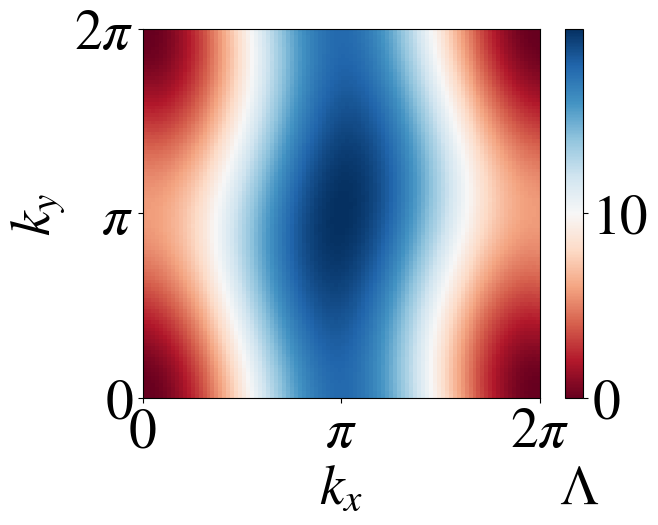

In [157]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.imshow(M_w1_1,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-50, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}$') 
plt.show()

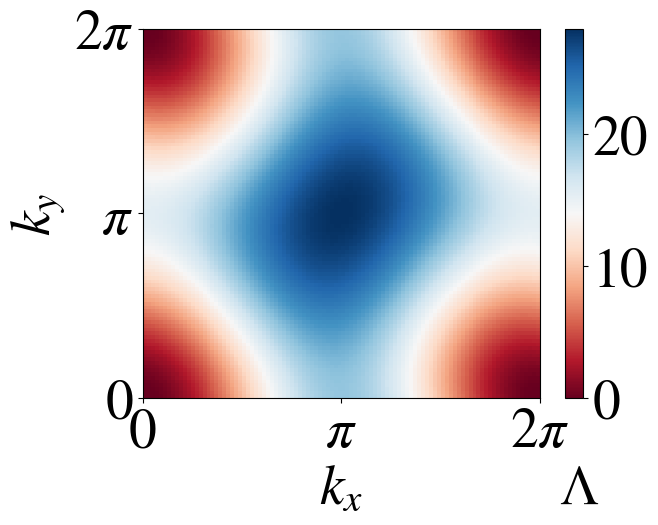

In [158]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.imshow(M_w1_3,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-50, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}$') 
plt.show()

In [86]:
def L_1_down_waffle(NN,LL,w1,w2,w3,w4):
    def find_L(kx,ky,w1,w2,w3,w4):
        return 4*w1*sin(kx/2)^2+4*w2 * sin(ky/2)^2 + 4 * w3 * sin((kx+ky)/2)^2+ 4 * w4 * sin((kx-ky)/2)^2
    L = []
    KX = np.linspace(0,n(2 * pi),NN)
    KY = np.linspace(0,n(2 * pi),LL)
    M = matrix(RDF, NN, LL, [find_L(kx,ky,w1,w2,w3,w4) for kx in KX for ky in KY])
    return KX,KY,M

In [87]:
KX,KY,M_waffle_down_w1_1 = L_1_down_waffle(100,100,1,4,W_3(1,4),W_4(1,4))
KX,KY,M_waffle_down_w1_3 = L_1_down_waffle(100,100,3,4,W_3(3,4),W_4(3,4))

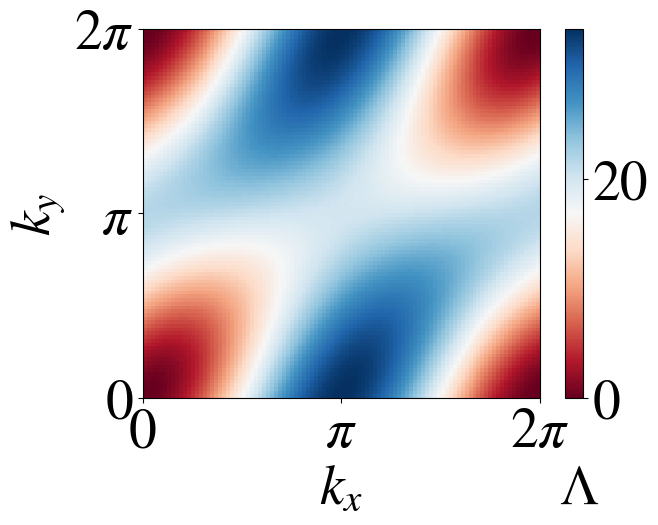

In [159]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
KX,KY,M = L_1_down_waffle(100,100,w1,w2,w3,w4)
plt.imshow(M_waffle_down_w1_1,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-50, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}, w_4 = 4$')
plt.show()

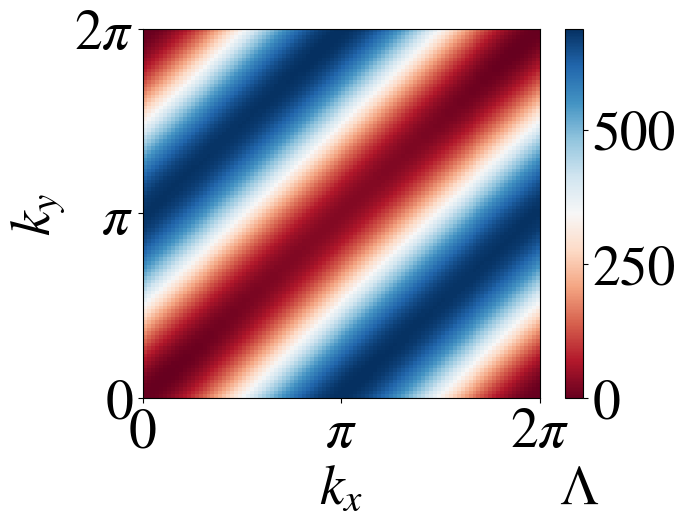

In [160]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
KX,KY,M = L_1_down_waffle(100,100,w1,w2,w3,w4)
plt.imshow(M_waffle_down_w1_3,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-70, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}, w_4 = 4$')
plt.show()

# Plot $L_1^{up}$

In [93]:
i = sqrt(-1)
def find_L(kx,ky,w1,w2,w3):
    Constant = 1/w1 + 1/w2 + 1/w3
    f = e^(i*ky)/w1 + e^(-i*kx)/w2 + 1/w3
    return N(Constant - sqrt(norm(f))).real(), N(Constant + sqrt(norm(f))).real()
def L_1_up_torus(NN,LL,w1,w2,w3):
    KX = np.linspace(0,n(2 * pi),NN)
    KY = np.linspace(0,n(2 * pi),LL)
    M1 = matrix(RDF, NN, LL, [find_L(kx,ky,w1,w2,w3)[0] for kx in KX for ky in KY])
    M2 = matrix(RDF, NN, LL, [find_L(kx,ky,w1,w2,w3)[1] for kx in KX for ky in KY])
    return KX,KY,M1,M2

In [94]:
w1 = 1
w2 = 4
w3 = W_3(w1,w2)
w4 = W_4(w1,w2)
KX,KY,M1_up_torus_1,M2_up_torus_1 = L_1_up_torus(100,100,w1,w2,w3)

In [95]:
w1 = 3
w2 = 4
w3 = W_3(w1,w2)
w4 = W_4(w1,w2)
KX,KY,M1_up_torus_3,M2_up_torus_3 = L_1_up_torus(100,100,w1,w2,w3)

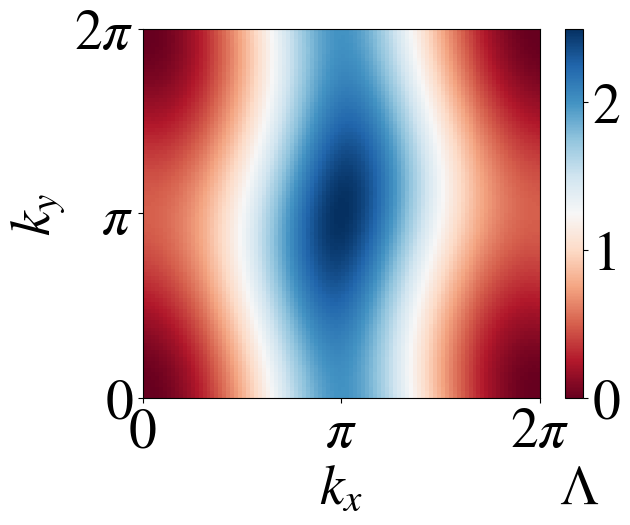

In [162]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.imshow(M1_up_torus_1,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-30, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}$')
plt.show()

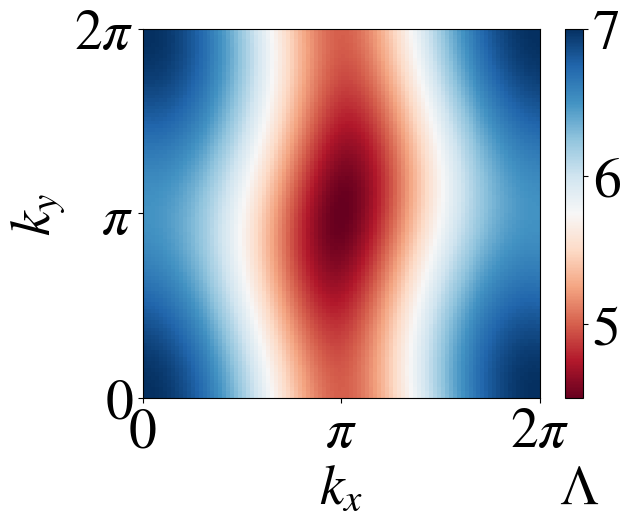

In [163]:
plt.imshow(M2_up_torus_1,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-30, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}$')
plt.show()

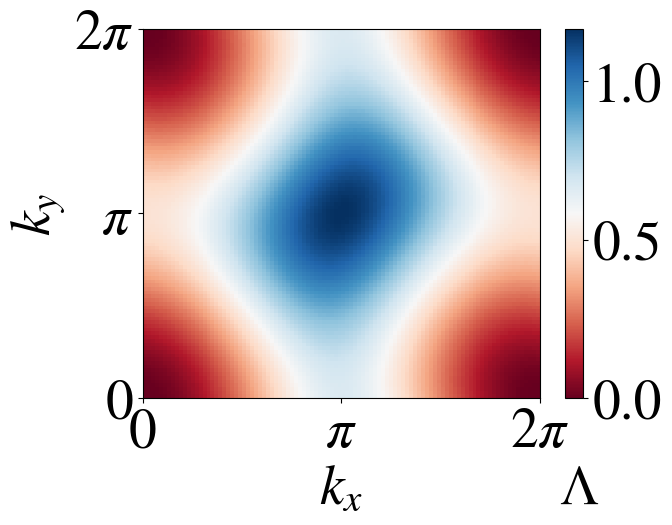

In [164]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.imshow(M1_up_torus_3,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-60, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}$')
plt.show()

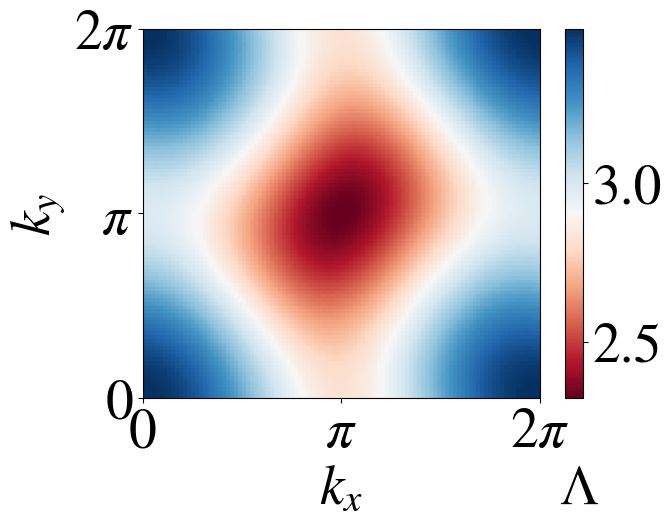

In [165]:
plt.rcParams.update({'font.size': 40})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.imshow(M2_up_torus_3,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-60, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}$')
plt.show()

### Triangulated Waffle

In [110]:
from sympy import solve, roots, real_roots, factor, nroots, RootOf, expand
from sympy import Poly

In [111]:
x = var('x')
def find_L(kx,ky,w1,w2,w3,w4):
    R = PolynomialRing(QQ, 'x')
    f = (w1*w2*w3*w4*x^4 + (-2*w1*w2*w3 + (-2*w1*w2 + (-4*w1 - 4*w2)*w3)*w4)*x^3 + (4*w1*w2 + (w1*(-2*cos(kx) + 6) + w2*(-2*cos(ky) + 6))*w3 + (((-4*cos(kx) + 4)*cos(1*ky) + 4*cos(kx) + 12)*w3 + w1*(-2*cos(1*kx) + 6) + w2*(-2*cos(ky) + 6))*w4)*x^2 + ((8*cos(kx)*cos(ky) - 8*sin(kx)*sin(ky) - 8)*w3 + (8*cos(kx)*cos(ky) + 8*sin(kx)*sin(ky) - 8)*w4 + w1*(8*cos(kx) - 8) + w2*(8*cos(ky) - 8))*x)/(w1*w2*w3*w4)
    sol1,sol2,sol3,sol4 = nroots(f)
    return float(sol1),float(sol2),float(sol3),float(sol4)
def W_3(w1,w2):
    return 1/(1/sqrt(w1) + 1/sqrt(w2))^2
def W_4(w1,w2):
    return 1/(1/sqrt(w1) - 1/sqrt(w2))^2

def L_1_up_waffle(NN,LL,w1,w2,w3,w4):
    M1 = []
    M2 = []
    M3 = []
    M4 = []
    for i in range(NN):
        Rows1 = []
        Rows2 = []
        Rows3 = []
        Rows4 = []
        for j in range(LL):
            try:
                Sol = find_L(2*i*pi/NN,2*j*pi/LL,w1,w2,w3,w4)
                Rows1.append(Sol[0])
                Rows2.append(Sol[1])
                Rows3.append(Sol[2])
                Rows4.append(Sol[3])
            except:
                return j
        M1.append(Rows1)
        M2.append(Rows2)
        M3.append(Rows3)
        M4.append(Rows4)
    return M1,M2,M3,M4

In [113]:
w1 = 1
w2 = 4
w3 = W_3(w1,w2)
w4 = W_4(w1,w2)
M1_up_w_1,M2_up_w_1,M3_up_w_1,M4_up_w_1 = L_1_up_waffle(100,100,w1,w2,w3,w4)

In [114]:
w1 = 3
w2 = 4
w3 = W_3(w1,w2)
w4 = W_4(w1,w2)
M1_up_w_3,M2_up_w_3,M3_up_w_3,M4_up_w_3 = L_1_up_waffle(100,100,w1,w2,w3,w4)

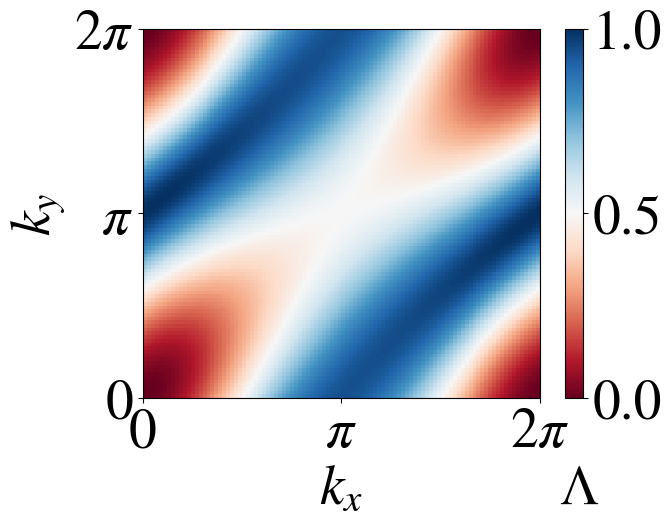

In [182]:
plt.rcParams.update({'font.size': 40})
plt.imshow(M2_up_w_1,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-60, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}, w_4 = 4$')
plt.show()

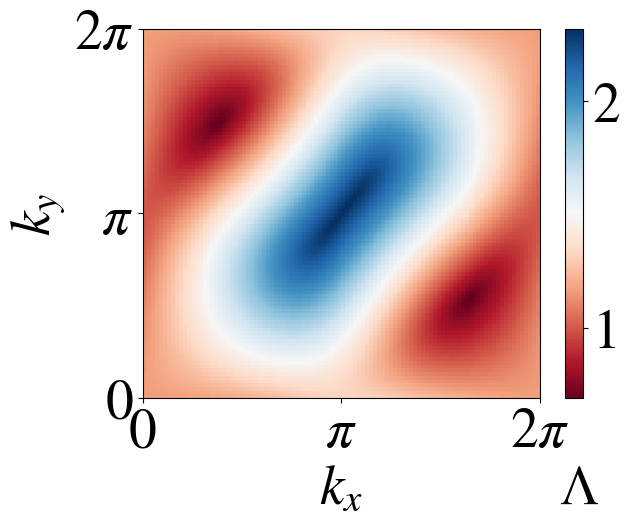

In [177]:
plt.imshow(M3_up_w_3,cmap=cm.RdBu, extent=(0, 2, 0, 2), origin = "lower", interpolation='none',  aspect="auto")
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.xticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.yticks([0, 1, 2], ['0', r'$\pi$', r'$2\pi$']) 
plt.colorbar().set_label(r'$\Lambda$', labelpad=-30, y=-0.18, rotation=0)
#plt.title(r'$w_1 = 1, w_2 = 4, w_3 = \frac{4}{9}, w_4 = 4$')
plt.show()